# $2^2$ Factorial Designs
## Improving Efficiency of Factorial Designs
### Dr Austin R Brown
### School of Data Science and Analytics
#### Kennesaw State University

In [20]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
#github_username = "abrown9008"

# 2. Name of the repo (don't change unless your fork name is different)
#repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
#repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
#cwd = os.getcwd()
#if cwd.endswith(repo_name):
#    print(f"✅ Already inside repo folder: {cwd}")
#else:
    # --- If the repo folder exists, check if it's nested ---
#    if os.path.exists(repo_name):
#        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
#    else:
#        print(f"📥 Cloning repo from {repo_url}...")
#        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
#    if os.path.exists(repo_name):
#        os.chdir(repo_name)
#        print(f"📂 Changed directory to: {os.getcwd()}")
#    else:
#        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
#remote_url = os.popen("git config --get remote.origin.url").read().strip()

#if "abrown9008" in remote_url:
#   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
#    print("💡 Please fork the repo to your own account and update `github_username` above.")
#else:
#    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Fractional Factorial Design"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'Fractional Factorial Design'

## Introduction

- In the last section, we learned about factorial designs.

- Such a design is appropriate when we have multiple treatment factors (each with 2+ levels) and we want to study these main effects and the potential interactions between them.

- But let's consider some other situations where a full factorial design might initially make sense, but some alternatives may prove more effective and useful.

- Remember in the Instagram Ads example, we had two treatment factors, Ad Content and Ad Format, each with two levels (funny/informational and image/video).

    - This gave us a total of four treatment combinations.

- Suppose we wanted to rerun the experiment, but now we have a third treatment factor, Ad Color Palette, with three levels (blue, red, and green).

    - This would give us a total of 12 treatment combinations.

- Supposing we would want 10 replications of each treatment combination, this would require a total of 120 experimental units.

    - This is an increase of 80 experimental units from the original design (supposing $r=10$).

- In some cases, the cost of running these additional experiments and/or collecting these additional observations may not be overly high.

    - But in other cases, it may be prohibitive because of time and/or money constraints.

        - So what do we do?

- In experimental situations where we may be interested in screening a large number of factors *or* where the cost of running all factor combinations is too great in terms of time or money, a $2^k$ factorial design provides and efficient way to explore our main effects and interactions with fewer experiments.

- A $2^k$ design is used to study the effects of $k$ factors, each at two levels (e.g., high and low), on some outcome/response.

    - It allows researchers to efficiently explore the main effects and interactions of multiple factors with a **manageable number of experimental runs**

- The key here is taking a potentially complex design and simplifying it by having every treatment effect simply be a pairwise comparison.

- As we will see, it also simplifies computations quite a bit.

- Before we get into the general case, let's talk about the simplest case, the $2^2$ factorial design.

### Experimental Example: Mobile App

- A popular hot wings chain called **Buster's Blazing Wings** wants to develop a new mobile app to enhance customer engagement and boost online orders.

- The development team has identified two key factors that may impact **monthly purchases**:
    1.  Push Notifications (we'll call this factor A) - Enabled (+) or Disabled (-)
    2.  Loyalty Program (we'll call this factor B) - Basic (points-based +) or Enhanced (includes exclusive discounts -)
        - Note, we will use $+/-$ notation to denote the levels of the main effects

- For each of the $2^2=4$ treatment combinations, suppose we randomly recruit $r=3$ customers to pilot the app. After a month of using the app, we record their monthly purchases.
    - The data are stored in the `2^2 Wings Example.xlsx`

#### Considering the Context: Overall Goal and Variable Specification

- As we've done before, we can work out the roadmap of our experiment:

    - We are trying to quantify the effect main effects (Push Notifications and Loyalty Program) as well as their interaction have on our outcome, monthly restaurant sales.

- You can imagine there likely being some lurking variables working with human participants, so hopefully we've done a good job sampling app users/customers who are relatively homogeneous.

#### Considering the Context: Specifying Hypotheses

- Our hypotheses in this case would be the same as our hypotheses for the two-factor factorial design.

$$ H_{01}: \alpha_{\text{Enabled}} = \alpha_{\text{Disabled}} = 0 $$
$$ H_{11}: \text{At least one } \alpha_i \neq 0 $$

$$ H_{02}: \beta_{\text{Enhanced}} = \beta_{\text{Points}} = 0 $$
$$ H_{12}: \text{At least one } \beta_j \neq 0 $$

$$ H_{03}: (\alpha\beta)_{EE} = (\alpha\beta)_{EP} = (\alpha\beta)_{DE} = (\alpha\beta)_{DP} = 0 $$
$$ H_{13}: \text{At least one } (\alpha\beta)_{ij} \neq 0 $$

- We will discuss how the computations simplify in the $2^2$ case.

#### Considering the Context: Exploring the Data

- With such a small dataset, we can visually examine the structure in a tabular format:

| A  | B  | Treatment Combo     | Rep 1   | Rep 2   | Rep 3   | Total  |
|----|----|---------------------|---------|---------|---------|--------|
| -  | -  | Enabled/Enhanced    | 151.80  | 179.99  | 154.92  | 486.71 |
| -  | +  | Enabled/Points      | 136.15  | 141.49  | 152.41  | 430.05 |
| +  | -  | Disabled/Enhanced   | 129.30  | 119.98  | 131.79  | 381.07 |
| +  | +  | Disabled/Points     | 107.22  |  44.72  |  77.85  | 229.79 |

- For the sake of notation, let:

    - Capital "A" denote the effect of factor A (Push Notifications in our case)
    - Capital "B" denote the effect of factor B (Loyalty Program in our case)
    - Capital "AB" denotes the interaction between the main effects.

- Additionally, let:

    - $a$ represent the treatment combination of A at the + level and B at the - level
    - $b$ represent the treatment combination of A at the - level and B at the + level
    - $ab$ represents both factors at the + level
    - $(1)$ is used to denote both factors at the - level
    - We can use these symbols to denote the values in the *Total* column of Table 1

##### The Effect of A

- Our goal in a factorial design, $2^2$ or otherwise, is to quantify the effect of a given factor or factors on the outcome.

- In a $2^2$ factorial design, the average effect of a given factor (say A) is the change in the outcome/response when that factor's level changes (+ to - or vice versa), averaged across all levels of the other factor (say B).

- The effect of A at the - level of B is (A at its + level less A at its - level while B is fixed at its - level averaged across the replicates):

$$ \frac{a - (1)}{r} $$

- The effect of A at the + level of B is (A at its + level less A at its - level while B is fixed at its + level averaged across the replicates):

$$ \frac{ab - b}{r} $$

- Averaging these two quantifies yields the **main effect of A**:

$$ A = \frac{1}{2}\bigg(\frac{a - (1)}{r} + \frac{ab - b}{r}\bigg) $$ $$ A = \frac{1}{2r}(ab + a - b - (1)) $$

- So in our case:

$$ A = \frac{1}{2(3)}(229.79 + 381.07 - 430.05 - 486.71) = \frac{-305.90}{6} = -50.98 $$

- The effect of $A$ is negatively signed suggesting that moving from the - level (Enabled Notifications) to the + level (Disabled Notifications) is associated with a decrease in monthly spend.

##### The Effect of B

- We can do the exact same thing to quantify the effect of $B$. The effect of $B$ at the - level of $A$ is:

$$ \frac{b-(1)}{r} $$

- The effect of $B$ at the + level of $A$ is:

$$ \frac{ab - a}{r} $$

- Averaging these two quantifies yields the **main effect of B**:

$$ B = \frac{1}{2r}(ab+b-a-(1)) $$

- In our case, this works out to be:

$$ B = \frac{1}{2(3)}(229.79+430.05-381.07-486.71) = \frac{-207.94}{6} = -34.66 $$

- Again, since the effect of $B$ is negatively signed, this suggests that moving from the - level (Enhanced) to the + level (Points) is associated with a decrease in monthly spend.

- Now, what about the interaction effect?

##### The Interaction Effect, AB

- We define the interaction effect, $AB$, as the average difference between the effect of $A$ at the + level of $B$ and the effect of $A$ at the - level of $B$:

$$ AB = \frac{1}{2r}((ab-b) - (a-(1))) $$

- In our case:

$$ AB = {1}{2(3)}(229.79-430.05-381.07+486.71) = \frac{-97.62}{6} = -15.77 $$

- Here, the interpretation is a little more involved.

- Since the sign is negative, this implies that as we move from the - level (Enabled Notifications) of $A$ to the + level of $A$ (Disabled Notifications) while simultaneously moving from the - level (Enhanced) level of $B$ to the + level of $B$ (Points), we would expect to see a decrease in monthly spend.

- This is best observed in our boxplot/interaction combination plot:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Push_Notifications  12 non-null     object 
 1   Loyalty_Program     12 non-null     object 
 2   Sales               12 non-null     float64
dtypes: float64(1), object(2)
memory usage: 420.0+ bytes
None


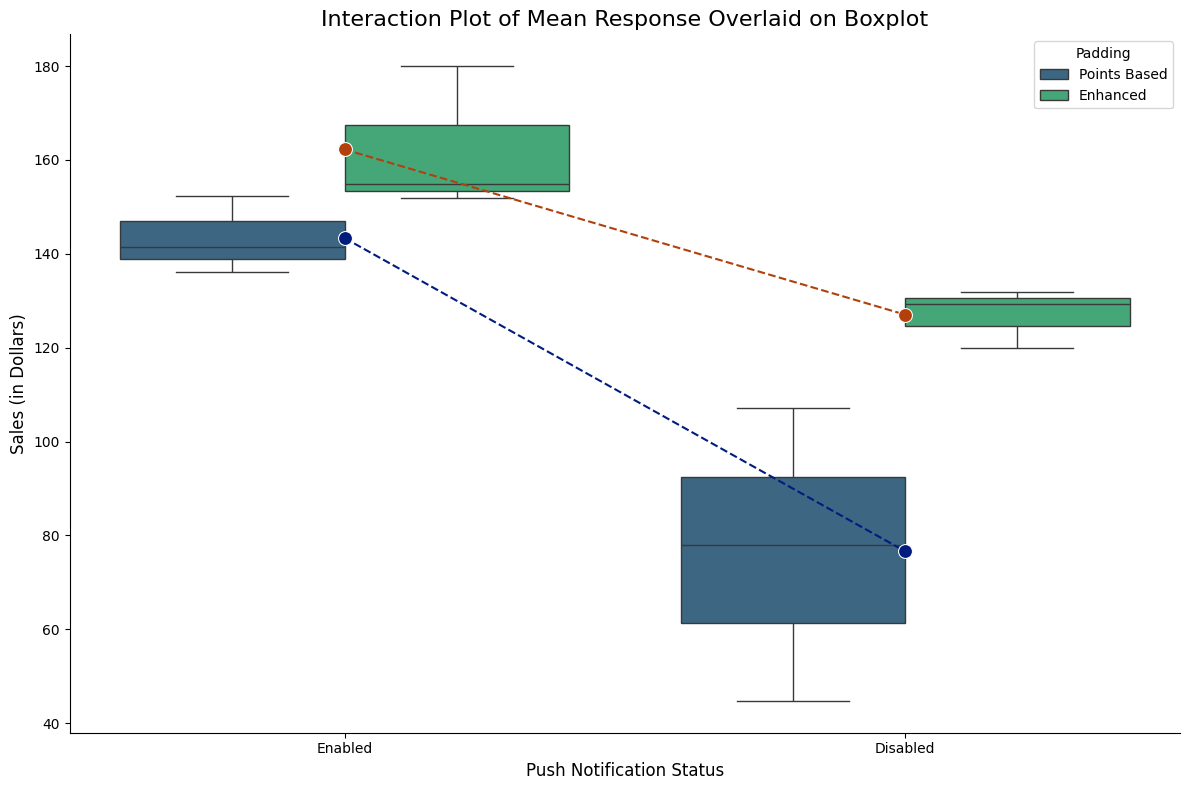

In [ ]:
## Import Relevant Libraries ##
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read in 2^2 Wings Example Excel File ##

wings = pd.read_excel("2^2 Wings Example.xlsx")

## Data Integrity Check ##

print(wings.info())

## Create Combo Plot ##

## Step 1: Create a figure and a single axes object to plot on. ##

fig, ax = plt.subplots(figsize=(12, 8))

## Step 2: Plot the boxplot first, on the raw data.
## We set 'ax=ax' to ensure it's drawn on our specified axes.
## 'dodge=True' separates the boxes for different padding types.
## 'zorder=2' places it below the line plot. ##

sns.boxplot(data=wings, x='Push_Notifications', y='Sales', hue='Loyalty_Program',
            palette='viridis', dodge=True, ax=ax, zorder=2)

## Step 3: Overlay the interaction plot (line plot of the means).
## Seaborn's lineplot() can automatically calculate the mean for each group.
## We use the same 'x', 'y', and 'hue' to ensure alignment.
## We specify 'marker' to show the points at the means.
## 'zorder=3' places it on top of the boxplot for better visibility.

sns.lineplot(data=wings, x='Push_Notifications', y='Sales', hue='Loyalty_Program',
             marker='o', markersize=10, ax=ax, zorder=3,
             estimator='mean', err_style=None, linestyle='--',
             palette='dark')

## Step 4: Clean up the plot: set titles, labels, and theme. ##

ax.set_title('Interaction Plot of Mean Response Overlaid on Boxplot', fontsize=16)
ax.set_xlabel('Push Notification Status', fontsize=12)
ax.set_ylabel('Sales (in Dollars)', fontsize=12)

## Adjust legend to avoid duplicate labels ##
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title='Loyalty Program')

## Apply a classic theme by removing the top and right spines. ##

sns.despine()
plt.tight_layout()

## Show Plot ##

plt.show()

- Contextually, we can see evidence that there may be a significant push notification effect as well as loyalty program effect.

- To evaluate this statistically, we can perform the same tests that we did for regular factorial ANOVA. 

- Let's go ahead and fit our two-way ANOVA model, assess our assumptions, and then draw conclusions using the same series of steps we've used all term:

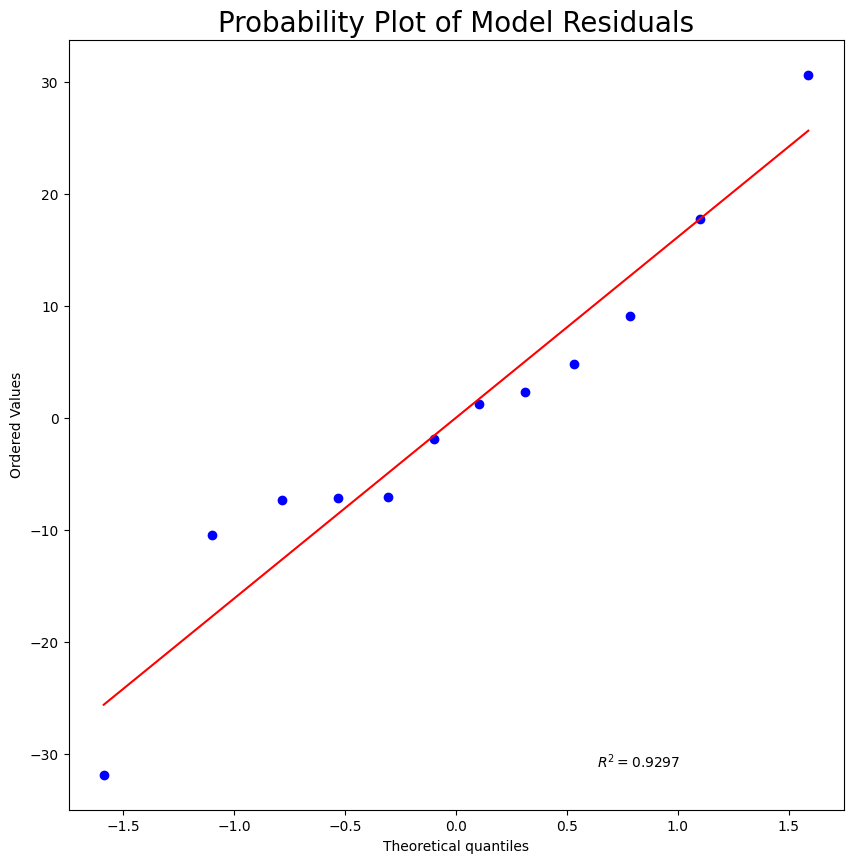

ShapiroResult(statistic=np.float64(0.9550040553317627), pvalue=np.float64(0.7108519575304405))


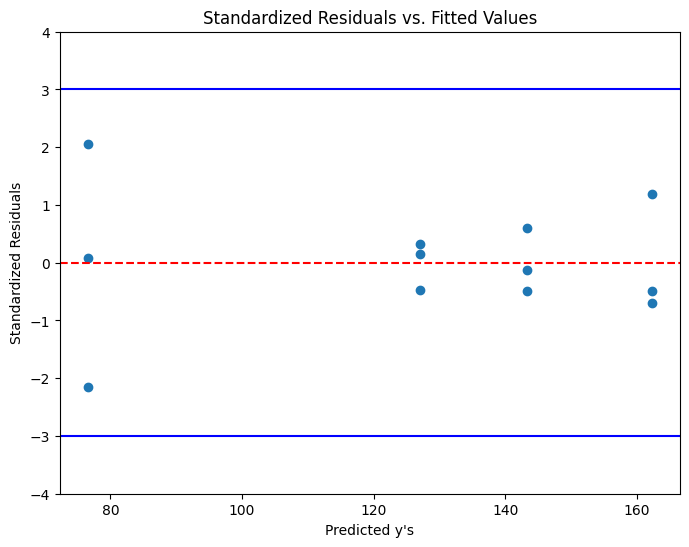

F-statistic: 3.0401073592195504
F p-value: 0.0926816697624573


In [ ]:
## Import Relevant Libraries ##
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats

## Fit ANOVA Model ##

wings_mod = ols("Sales~Push_Notifications*Loyalty_Program",data=wings).fit()

## Evaluate Normality Assumption ##

## QQ-Plot ##

## Extract Model Residuals ##

residuals = wings_mod.resid

## Generate QQ plot ##

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(residuals, plot= plt, rvalue= True)
ax.set_title("Probability Plot of Model Residuals", fontsize= 20)
ax.set

plt.show()

## S-W Test ##

print(stats.shapiro(residuals))

## Constant Variance ##

## Scatterplot of Standardized Residuals to Fitted Values ##

## Obtain Standardized Residuals ##

standardized_residuals = wings_mod.get_influence().resid_studentized_internal

## Get the fitted values ##

fitted_values = wings_mod.fittedvalues

## Create the plot ##

plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, standardized_residuals)
plt.axhline(y=0, linestyle='dashed', color='red')
plt.axhline(y=3, color='blue')
plt.axhline(y=-3, color='blue')
plt.xlabel("Predicted y's")
plt.ylabel("Standardized Residuals")
plt.title("Standardized Residuals vs. Fitted Values")
plt.style.use('classic')
plt.show()

## B-P Test ##

## Run B-P Test ##

bp_test = het_breuschpagan(wings_mod.resid,wings_mod.model.exog)

## Extract F-statistic ##

f_statistic = bp_test[2]

## Extract its P-Value ##

f_p_value = bp_test[3]

print(f"F-statistic: {f_statistic}")
print(f"F p-value: {f_p_value}")


- Looking at Normality first, the QQ-plot shows the points generally falling reasonably close to the diagnoal line. The p-value associated with the S-W test also gives us strong evidence in favor of the alternative hypothesis that the model residuals follow a normal distribution. Based on this evidence, I would conclude that the normality assumption is supported by the data.

- Now looking at Constant Variance, the scatterplot of the standardized residuals versus the fitted values shows the points randomly scatttered about 0. The heights of the vertical lines aren't exactly the same, but they also aren't wildly different. The p-value associated with the B-P test also gives us strong evidence in favor of the alternative hypothesis that the model residuals have a constant variance. So based on this evidence, I feel good that the constant variance assumption is supported by the data.

- Since we've established evidence for the assumptions being met, let's check out the results:

In [ ]:
## Print ANOVA Table ##

print(sm.stats.anova_lm(wings_mod,typ=3))

                                          sum_sq   df           F    PR(>F)
Intercept                           48404.781633  1.0  146.237138  0.000002
Push_Notifications                   1859.968267  1.0    5.619206  0.045212
Loyalty_Program                      3814.273067  1.0   11.523415  0.009435
Push_Notifications:Loyalty_Program    746.078700  1.0    2.254001  0.171666
Residual                             2648.015800  8.0         NaN       NaN


- Here we can see that:
    - For the interaction effect, we have significant evidence in favor of the **null hypothesis** ($F(1,8) = 2.25$, $p=0.172$)
    - For the B, Loyalty Program effect, we have significant evidence in favor of the **alternative hypothesis** ($F(1,8) = 11.52$, $p=0.009$)
    - For the A, Push Notifications effect, we also have significant evidence in favor of the **alternative hypothesis** ($F(1,8) = 5.62$, $p=0.045$)

- Since the interaction effect is not significant and since we only have two levels for each of our main effects, a post-hoc test isn't necessary as we know which two levels may be significantly different from each other.

### Quantifying Effect Sizes

- The conclusion of our experiment is that we have evidence to suggest that enabling push notifications and using the enhanced loyalty program may lead to increased monthly spend among customers at Buster's Wings.

- But I want to return to our conversation about quantifying effects as this can be very important when our sample size is small or very large.

- Earlier in the lecture notes, we saw how to calculate the effect of $A$, $B$, and $AB$.

    - We also learned how to generally interpret the sign.

- However, the numeric value of the effects also has meaning (remember how we interpret the correlation coefficient...it's both the sign *and* the magnitude).

- Just like the interpretation of the correlation coefficient, we need to consider the magnitude of the effect in addition to its sign.

- Recall, the effect of $A$ was -50.98; the effect of $B$ was -34.66, and the effect of $AB$ was -15.77.

- Since our original units were dollars, the units of these effects is also dollars.

- So in an absolute sense, we may find \$51 and \$35 to be large effects whereas \$15 may be a smaller effect.

    - We saw this statistically: the larger effects were statistically significant while the smaller effect was not.

- However, \$15 is not zero. We saw in our interaction plot lines that were not parallel.

- In other words, we observed an effect, but the effect was not found to be meaningfully different than a 0 effect in a statistical sense.

- So how do we make sense of this result? We observed a non-zero effect but our statistical test is essentially calling it zero?

- Consider an independent means $t$-test statistic:

$$ t_{\text{Stat}} = \frac{\bar{y}_1 - \bar{y}_2}{\sqrt{s^2_{\text{Pooled}}\bigg(\frac{1}{r_1} + \frac{1}{r_2}\bigg)}} $$

- where:

$$ s^2_{\text{Pooled}} = \frac{(r_1 - 1)s_1^2 + (r_2 - 1)s_2^2}{r_1 + r_2 - 2} $$

- If we call $N=r_1+r_2$, then with a little rearranging, we can see:

$$ t_{\text{Stat}} = \frac{(\bar{y}_1-\bar{y}_2)\sqrt{r_1r_2(N-2)}}{\sqrt{N[(r_1-1)s_1^2 + (r_2-1)s_2^2]}} $$

- As $N\rightarrow \infty$, this suggests for $\bar{y}_1 - \bar{y}_2 \neq 0$ (a non-zero effect), there exists some value of $N$ that will push our test statistic into the critical region of the null distribution.

- In other words, if we have a negligible difference between our group means, we may still have $p<0.05$ for a large enough $N$.

- The converse may also be true. We may have a moderate and contextually meaningful difference between our group means, but we may observe $p>0.05$ for a relatively small $N$, like we see in our case.

- This is why considering effect sizes along with the statistical test is important.

- Here, we've learned how to calculate unstandardized effect sizes, meaning that they still exist in the units of the outcome variable.

- Words like "big" and "small" are tied to the scale of the units, which isn't desirable.

    - This is why we use the correlation coefficient instead of covariance...the former is *standardized* whereas the latter is not.

- So how do we standardize the effects we've already calculated?

#### Quantifying Effect Sizes: Partial $\eta^2$

- A common effect size for factorial ANOVA designs ($2^k$ or otherwise) is called *partial* $\eta^2$ (pronounced "eta"), usually denoted $\eta^2_p$.

- For a given effect, the calculation of $\eta^2_p$ is:

$$ \eta^2_p = \frac{SS_{\text{Effect}}}{SS_{\text{Effect}} + SSE} $$

- We interpret its value as the proportion of variance in the response explained by this specific factor after accounting for all the other factors in the model.

- In our $2^2$ case, for factor A, we can show that:

$$ SSA = A^2r $$ 
$$ \implies SSA = (-50.98)^2\times 3 = 7796.881 $$

- This suggests that:

$$ \eta_p^2 = \frac{7796.881}{7796.881 + 2648.0158} = 0.7465 $$

- This means that 74.65% of the variance in the response can be explained by the Push Notifications factor, controlling for the other factor in the model.

- Fortunately for us, we don't have to do this by hand. We have a package called `pingouin` that can help us out:

In [22]:
## Install pingouin ##
#%pip install pingouin
## Load pingouin ##
import pingouin as pg

## Fit ANOVA with pingouin ##

wings_mod_p = pg.anova(dv='Sales',between=["Push_Notifications","Loyalty_Program"],
                       effsize="np2",data=wings).round(4)

print(wings_mod_p[['Source','np2']])

                                 Source     np2
0                    Push_Notifications  0.7465
1                       Loyalty_Program  0.5764
2  Push_Notifications * Loyalty_Program  0.2198
3                              Residual     NaN


- In general, values of $\eta^2_p$ around 0.01 indicate a "small" effect,

- Values around 0.06 indicate a "medium" effect, and

- Values around 0.14 indicate a "large" effect

- For us, all of our effects are considered large with our main effect being considerably larger than our interaction effect.

- So here, we can see even though our interaction effect is generally considered large, our small sample size ($N=12$) prevents us from concluding that this large effect is statistically different from 0.

- This shows that a small sample size can be just as impactful on inference as a large sample!